# サポートベクターマシン（SVM）
- サポートベクターマシンを用いて、様々なデータを分類してみよう

## 1. ライブラリの読み込み

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 標準化
from sklearn.preprocessing import StandardScaler
# ホールドアウト法、グリッドサーチ
from sklearn.model_selection import train_test_split, GridSearchCV

# SVMを用いた分類モデル
from sklearn.svm import SVC
# 分類境界と各クラスの領域を表示
from common_func import plot_decision_regions


## 2. 線形分離可能なデータの場合

### 2-1. 疑似データの作成

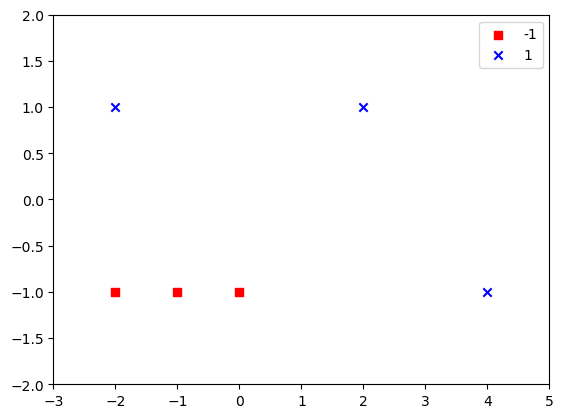

In [61]:
# 疑似データの作成
X = np.array([
    [-1, -1], [-2, -1], [ 0, -1], 
    [ 2,  1], [-2,  1], [ 4, -1]
])
y = np.array([ -1, -1, -1,  1,  1,  1])

# クラス-1のデータを表示
plt.scatter(x=X[:3, 0], y=X[:3,1], 
            color="r", marker="s", label="-1") 
# クラス1のデータを表示
plt.scatter(x=X[3:, 0], y=X[3:,1], 
            color="b", marker="x", label="1") 
# 表示範囲の調整
plt.xlim(-3, 5)
plt.ylim(-2, 2)
plt.legend()
plt.show()

### 2-2. モデルの構築・学習

In [70]:
# ペナルティ項の強さを設定
C = 10

# モデルの構築
# kernel:カーネル関数
clf = SVC(C=C,kernel="linear")

# モデルの学習
clf.fit(X, y) 

SVC(C=10, kernel='linear')

### 2-3. 予測結果の可視化

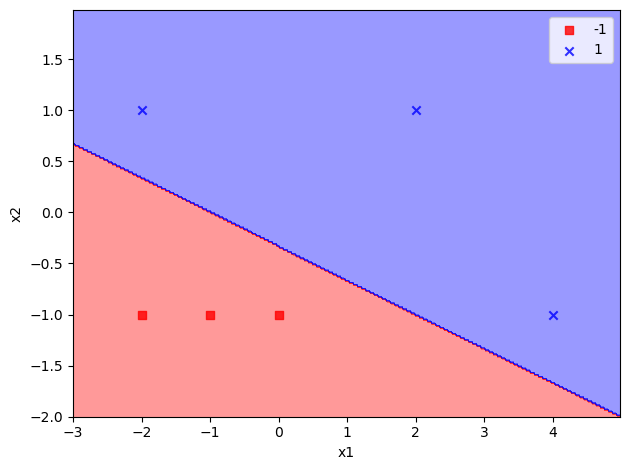

In [71]:
# 決定領域を描画
plot_decision_regions(X, y, classifier=clf)

# ラベルの設定
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper right')
# 表示位置を調整
plt.tight_layout()
plt.show()

### 2-4. 予測値の確認

In [72]:
# 線形識別関数（超平面）上の値を確認
# 値が0未満ならば、y=-1と判定される領域にいる
# 値が0以上ならば、y=1と判定される領域にいる
y_pred = np.dot(X, clf.coef_.T) + clf.intercept_
y_pred

array([[-1.49973333],
       [-1.99973333],
       [-0.99973333],
       [ 2.99946667],
       [ 0.99946667],
       [ 1.00026667]])

### [演習]
* Cの値をいろいろ変えて、結果がどうかわるか確認してみよう

## 3. 線形分離不可能なデータの場合

### 3-1. 疑似データの作成 

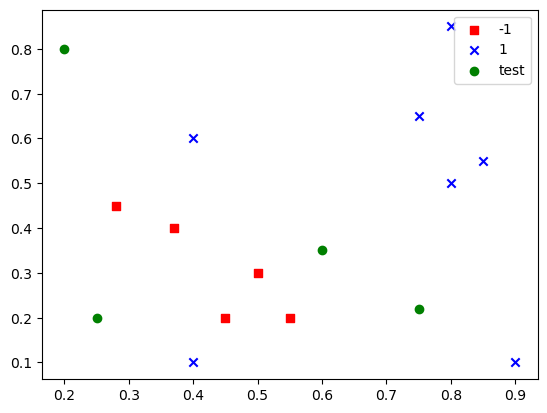

In [75]:
# 学習用データの作成
df_simple = pd.DataFrame({
    "label":[1,1,1,1,1,1,1,-1,-1,-1,-1,-1],
    "x1":[0.4,0.9,0.8, 0.75,0.85,0.4,0.8,0.5,0.28,0.37,0.45,0.55],
    "x2":[0.1,0.1,0.85,0.65,0.55,0.6,0.5,0.3,0.45,0.4, 0.2, 0.2]
})
# 説明変数・目的変数に分割
X_train = df_simple[["x1","x2"]].values
y_train = df_simple["label"].values

# テスト用データの作成
X_test = np.array([
    [0.6, 0.35], [0.75, 0.22],[ 0.2,  0.8], [0.25,  0.2]
])

# クラス-1のデータを表示
plt.scatter(x=X_train[7:, 0], y=X_train[7:,1], 
            color="r", marker="s", label="-1") 
# クラス1のデータを表示
plt.scatter(x=X_train[:7, 0], y=X_train[:7,1],             
            color="b", marker="x", label="1") 
# テスト用データを表示
plt.scatter(x=X_test[:, 0], y=X_test[:7,1],             
            color="g", marker="o", label="test") 

# 表示位置を調整
plt.legend(loc='upper right')
plt.show()

### 3-2. モデルの構築・学習

In [79]:
# 標準化
stdsc = StandardScaler()
X_train_s = stdsc.fit_transform(X_train)
X_test_s = stdsc.transform(X_test)

# モデルの構築
C = 5
clf = SVC(C=C, kernel="linear")
# モデルの学習
clf.fit(X_train_s, y_train)

SVC(C=5, kernel='linear')

### 3-3. 予測結果の可視化

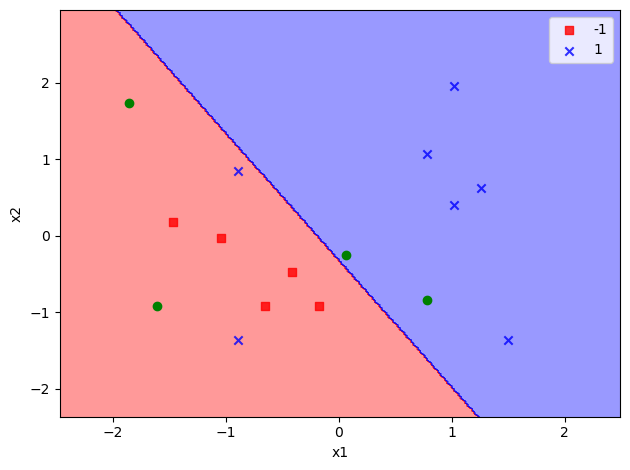

In [80]:
# 未知のデータを識別する
clf.predict(X_test_s)
# 決定領域を描画する
plot_decision_regions(X_train_s, y_train, classifier=clf)
# テスト用データを重ねて表示
plt.plot(X_test_s[:,0], X_test_s[:,1], color="g", marker="o",ls="")

# ラベルの設定
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper right')
# 表示位置を調整
plt.tight_layout()
plt.show()

### 3-4. 予測値の確認

In [81]:
# 線形識別関数（超平面）上の値を確認
# 値が0未満ならば、y=-1と判定される領域にいる
# 値が0以上ならば、y=1と判定される領域にいる
np.dot(X_train, clf.coef_.T) + clf.intercept_

array([[-1.75799461],
       [ 0.99999971],
       [ 2.75708702],
       [ 1.86563794],
       [ 2.10941198],
       [-0.2188705 ],
       [ 1.67970014],
       [-0.5907461 ],
       [-1.34252637],
       [-0.9999998 ],
       [-1.17437036],
       [-0.62277149]])

### [演習]
* Cの値をいろいろ変えて、結果がどうかわるか確認してみよう
* X_testのデータを変えて、結果がどうかわるか確認してみよう

## 4. カーネル関数の適用

### 4-1. モデルの構築・学習

In [82]:
# ペナルティ項の強さを設定
C = 5

# RBF: Radial Basis Function,動径既定関数
# ガウスカーネルと同様のもの
kernel = "rbf"
# RBFのパラメータgammaを設定
gamma = 1

# モデルの構築
clf = SVC(C=C, kernel=kernel, gamma=gamma)
# モデルの学習
clf.fit(X_train_s, y_train)

SVC(C=5, gamma=1)

### 4-2. 予測結果の可視化

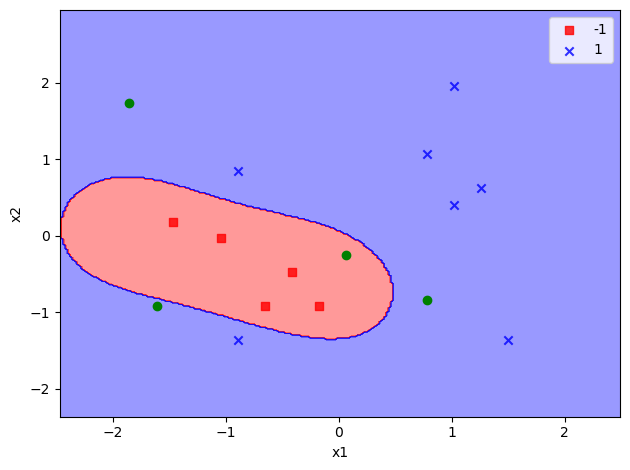

In [84]:
# 未知のデータを識別する
clf.predict(X_test_s)
# 決定領域を描画する
plot_decision_regions(X_train_s, y_train, classifier=clf)
# テスト用データを重ねて表示
plt.plot(X_test_s[:,0], X_test_s[:,1], color="g", marker="o",ls="")

# ラベルの設定
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper right')
# 表示位置を調整
plt.tight_layout()
plt.show()

### [演習]
* Cの値をいろいろ変えて、結果がどうかわるか確認してみましょう
* gammaの値をいろいろ変えて、結果がどうかわるか確認してみましょう

## 5. ハイパーパラメータ探索

- グリッドサーチを使い、最適なCを探してみよう


### 5-1. データの読み込み
- [Phishing WebSite Dataset](https://www.kaggle.com/datasets/akashkr/phishing-website-dataset)
    - フィッシングサイトかどうかを識別する、二値分類のデータセット
- 目的変数
    - Result：あるサイトがフィッシングサイトであるか
- 説明変数（30個、全て-1, 0, 1のカテゴリ変数）
    0. having_IP_Address
    1. URL_Length
    2. Shortining_Service
    3. having_At_Symbol
    4. double_slash_redirecting
    5. Prefix_Suffix
    6. having_Sub_Domain
    7. ~SSLfinal_State~
    8. Domain_registeration_length',
    9. Favicon
    10. port
    11. HTTPS_token
    12. Request_URL
    13. ~URL_of_Anchor~
    14. Links_in_tags
    15. SFH
    16. Submitting_to_email
    17. Abnormal_URL
    18. Redirect
    19. on_mouseover
    20. RightClick
    21. popUpWidnow
    22. Iframe
    23. age_of_domain
    24. DNSRecord
    25. web_traffic
    26. Page_Rank
    27. Google_Index
    28. Links_pointing_to_page
    29. Statistical_report

In [89]:
# CSVファイルの読み込み
df = pd.read_csv("../../1_data/ch10/phishing_website_dataset.csv")

# データセットの中身を確認
print(df.shape)
df.head()

(11055, 31)


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


### 5-2. データの前処理

In [94]:
# 説明変数/目的変数の分割
X = df.drop("Result", axis=1).values
y = df["Result"].values

# 学習用/テスト用の分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 明らかに有効な説明変数(7番目、13番目)を除いておく
indices = list(set(range(30)) - set([7, 13]))

X_train = X_train[:, indices]
X_test = X_test[:, indices]

### 5-3. グリッドサーチの実行
- scikit-learnの[GridSearchCV()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)を用いると、簡単にグリッドサーチを行える

In [95]:
# 探索するパラメータ（ここを編集）
parameters = {
    'kernel':['linear', 'rbf'], 
    'C':[1, 5]
} 

# モデルの構築
# gamma=scaleに設定すると、gammaが自動で計算される
model = SVC(gamma="scale") 

# グリッドサーチ＆交差検証を行う
# 交差検証のグループ数は3に設定
clf = GridSearchCV(model, parameters, cv=3,)

# ハイパーパラメータ探索の実行
clf.fit(X_train, y_train)

# 最良のパラメータと、そのときの評価値を表示
print(clf.best_params_, clf.best_score_)

{'C': 5, 'kernel': 'rbf'} 0.8904097696260695


### [演習]
* parametersを変更して、ベストなkernel, C, gammaを探してみよう 
* 探索するパターンを増やしすぎると、計算に時間がかかるため注意

### 5-4. モデルの評価
- インスタンス化の際に `refit = True` と設定していれば、再学習の必要はない（デフォルト値は `True`）

In [100]:
# 最適なハイパーパラメータをもつモデルを取得
clf_best = clf.best_estimator_

# テスト用データで汎化性能を確認
print("test_accuracy: ",clf_best.score(X_test, y_test))

test_accuracy:  0.9023213747362074
